<a href="https://colab.research.google.com/github/kkwakkwaks/CP2_-/blob/main/cp2_0921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False 

In [4]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
pip install -U pandas-profiling

In [6]:
import pandas_profiling

# 데이터 불러오기

In [8]:
# path = '/content/drive/MyDrive/cp2/0227_0917 채팅 데이터_최종본.xlsx'
# # path = '/content/gdrive/MyDrive/cp2/0227_0917 채팅 데이터_최종본.xlsx'

# df_chat = pd.read_excel(path,sheet_name = 0) # 채팅데이터
# df_chatR = pd.read_excel(path,sheet_name = 1) # 채팅 로우데이터
# df_room = pd.read_excel(path,sheet_name = 2) # 방 정보
# df_celeb = pd.read_excel(path,sheet_name = 3) # 셀럽 정보

In [45]:
path_celeb = '/content/drive/MyDrive/cp2/celebrity.csv'
path_char  = '/content/drive/MyDrive/cp2/chat_data.csv'
path_charR = '/content/drive/MyDrive/cp2/chat_raw.csv'
path_room  = '/content/drive/MyDrive/cp2/room_info.csv'

df_celeb = pd.read_csv(path_celeb,encoding='CP949')
df_chat  = pd.read_csv(path_char,encoding='CP949')
# df_chatR = pd.read_csv(path_charR,encoding='CP949')
df_room  = pd.read_csv(path_room,encoding='CP949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. celeb data

In [11]:
df_celeb

,닉네임,이메일,방인원,회원가입일,보유샷,받은샷,셀럽 여부
0,귀욤효닝뀨,azaazaez@gmail.com,4,2022-09-19 10:30:21.710,NaN,NaN,celeb
1,은담비_,tamptambin@naver.com,1,2022-09-18 23:37:01.460,NaN,NaN,celeb
2,안치주,eamy101247@naver.com,1,2022-09-18 18:45:22.980,NaN,NaN,celeb
3,티아쿠아,tiaqua1013@naver.com,1,2022-09-18 17:30:49.457,NaN,NaN,celeb
4,옥숭아,wnghkdznzl@naver.com,1,2022-09-18 17:15:54.370,NaN,NaN,celeb
...,...,...,...,...,...,...,...
1378,솔로몬,rlawjddnja1@daum.net,4,2021-06-18 07:07:39.000,NaN,NaN,celeb
1379,위칭,witching_@daum.net,135,2021-06-12 13:53:34.000,40.0,4570.0,celeb
1380,한나랑 뚜뚜랑 삼동이🔥,ziniworking@gmail.com,20,2021-06-12 10:42:59.000,NaN,233.0,celeb
1381,말썽 NO.1 고영희 🐈,dana@fancim.me,42,2021-06-12 05:56:31.000,300.0,5.0,celeb


In [9]:
df_celeb[df_celeb['방인원'] != 1]

,닉네임,이메일,방인원,회원가입일,보유샷,받은샷,셀럽 여부
0,귀욤효닝뀨,azaazaez@gmail.com,4,2022-09-19 10:30:21.710,NaN,NaN,celeb
5,Martina Rose,rose@onebitstudios.com,11,2022-09-18 11:31:51.763,NaN,NaN,celeb
6,땅콩이야,iamddce@naver.com,21,2022-09-17 22:47:31.360,NaN,210.0,celeb
10,글라세,sweet.glace92@gmail.com,22,2022-09-16 21:36:33.353,NaN,NaN,celeb
13,한라봄,han_rabom@naver.com,21,2022-09-16 14:01:39.980,NaN,NaN,celeb
...,...,...,...,...,...,...,...
1378,솔로몬,rlawjddnja1@daum.net,4,2021-06-18 07:07:39.000,NaN,NaN,celeb
1379,위칭,witching_@daum.net,135,2021-06-12 13:53:34.000,40.0,4570.0,celeb
1380,한나랑 뚜뚜랑 삼동이🔥,ziniworking@gmail.com,20,2021-06-12 10:42:59.000,NaN,233.0,celeb
1381,말썽 NO.1 고영희 🐈,dana@fancim.me,42,2021-06-12 05:56:31.000,300.0,5.0,celeb


## 2. chatR data

In [12]:
# df_chatR.head()

,message_id,channel_url,sender_id,sender_nickname,type,message,created_at
0,1701907401,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,으어~ 오늘도 재밌엉ㅎ습니다,2022-02-27 01:03:05+0900
1,1701907472,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,"@,@",2022-02-27 01:03:06+0900
2,1701914782,sendbird_group_channel_46714279_5689ed3637baad...,lch6191@naver.com,dvl zzang,MESG,dvl zzang 님이 나갔습니다.,2022-02-27 01:05:20+0900
3,1701937405,sendbird_group_channel_47434712_1b4c1283dc929d...,vip2405@daum.net,불새의전설,MESG,담사장 오늘도 너무고생했어요~!,2022-02-27 01:11:45+0900
4,1701973210,sendbird_group_channel_47137877_f7e02b815f1428...,skyshows@naver.com,어짜피 최고 귀여운 사람은 뽀린걸,MESG,뽀린걸 만세,2022-02-27 01:22:00+0900


## 3. room data

In [13]:
df_room

,channel_url,channel_name,message_count,channel_created_at,channel_custom_type,channel_member_count,read_receipt
0,sendbird_group_channel_75064829_d8867f901e00a8...,♡,39,1653640427,NaN,21,"{'wlwnsgh3@naver.com': 0, 'dldydgus1995@gmail...."
1,sendbird_group_channel_49383617_94ee4f7f4dc9d2...,김씨할매와 손주들,1,1634318408,NaN,25,"{'mind4826@naver.com': 0, 'fancimnpc2@fancim.m..."
2,sendbird_group_channel_46714279_5689ed3637baad...,임선비,65,1631694533,NaN,776,"{'jongone415@naver.com': 0, 'gim05209@naver.co..."
3,sendbird_group_channel_49386022_7ff846472c2bbe...,비비큐냠냠,1,1634321840,NaN,12,"{'everysleep0425@naver.com': 0, 'tlsehd1222@na..."
4,sendbird_group_channel_75092089_63f52f4b6b09f7...,왕군,125,1653655832,NaN,29,"{'gudwns9047@naver.com': 0, 'pdkkoedol@gmail.c..."
...,...,...,...,...,...,...,...
281,sendbird_group_channel_92898152_fc76af73046e9a...,네므님,1656,1663056795,NaN,29,"{'acewodnjs@naver.com': 0, 'fkriesz@gmail.com'..."
282,sendbird_group_channel_92937648_459e0eae1d1e7a...,정밀추적,6,1663084329,NaN,2,"{'a032714@naver.com': 0, 'fancimnpc6@fancim.me..."
283,sendbird_group_channel_92960482_de65180e83fbe1...,평범입니다!,317,1663112372,NaN,15,"{'ehak159@gmail.com': 0, 'dkdlrkdl74@naver.com..."
284,sendbird_group_channel_92964412_89e7646321c98e...,연루나,5,1663116353,NaN,2,"{'yonluna1115@gmail.com': 0, 'fancimnpc6@fanci..."


In [14]:
df_room.rename(columns = {'channel_name' : 'channel_owner'}, inplace = True)
df_room

,channel_url,channel_owner,message_count,channel_created_at,channel_custom_type,channel_member_count,read_receipt
0,sendbird_group_channel_75064829_d8867f901e00a8...,♡,39,1653640427,NaN,21,"{'wlwnsgh3@naver.com': 0, 'dldydgus1995@gmail...."
1,sendbird_group_channel_49383617_94ee4f7f4dc9d2...,김씨할매와 손주들,1,1634318408,NaN,25,"{'mind4826@naver.com': 0, 'fancimnpc2@fancim.m..."
2,sendbird_group_channel_46714279_5689ed3637baad...,임선비,65,1631694533,NaN,776,"{'jongone415@naver.com': 0, 'gim05209@naver.co..."
3,sendbird_group_channel_49386022_7ff846472c2bbe...,비비큐냠냠,1,1634321840,NaN,12,"{'everysleep0425@naver.com': 0, 'tlsehd1222@na..."
4,sendbird_group_channel_75092089_63f52f4b6b09f7...,왕군,125,1653655832,NaN,29,"{'gudwns9047@naver.com': 0, 'pdkkoedol@gmail.c..."
...,...,...,...,...,...,...,...
281,sendbird_group_channel_92898152_fc76af73046e9a...,네므님,1656,1663056795,NaN,29,"{'acewodnjs@naver.com': 0, 'fkriesz@gmail.com'..."
282,sendbird_group_channel_92937648_459e0eae1d1e7a...,정밀추적,6,1663084329,NaN,2,"{'a032714@naver.com': 0, 'fancimnpc6@fancim.me..."
283,sendbird_group_channel_92960482_de65180e83fbe1...,평범입니다!,317,1663112372,NaN,15,"{'ehak159@gmail.com': 0, 'dkdlrkdl74@naver.com..."
284,sendbird_group_channel_92964412_89e7646321c98e...,연루나,5,1663116353,NaN,2,"{'yonluna1115@gmail.com': 0, 'fancimnpc6@fanci..."


## chat data

In [46]:
df_chat.head()

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,으어~ 오늘도 재밌엉ㅎ습니다,2022-02-27 01:03:05+0900,celeb,135.0,NaN,NaN,NaN
1,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,"@,@",2022-02-27 01:03:06+0900,celeb,135.0,NaN,NaN,NaN
2,임선비,sendbird_group_channel_46714279_5689ed3637baad...,lch6191@naver.com,dvl zzang,MESG,dvl zzang 님이 나갔습니다.,2022-02-27 01:05:20+0900,fan,NaN,NaN,NaN,NaN
3,담사장 문열어??????,sendbird_group_channel_47434712_1b4c1283dc929d...,vip2405@daum.net,불새의전설,MESG,담사장 오늘도 너무고생했어요~!,2022-02-27 01:11:45+0900,fan,NaN,NaN,NaN,NaN
4,뽀린걸 Group Channel,sendbird_group_channel_47137877_f7e02b815f1428...,skyshows@naver.com,어짜피 최고 귀여운 사람은 뽀린걸,MESG,뽀린걸 만세,2022-02-27 01:22:00+0900,fan,NaN,NaN,NaN,NaN


# 데이터 전처리

## 1. chat data 전처리

In [47]:
# 데이터 맨 뒤의 쓰레기값 제거 ( 한 번만 실행하기 )
df_chat = df_chat[:-8]  

In [48]:
# id type 결측치 채우기
df_chat.loc[df_chat['channel_member_count'].isna() & df_chat['id type'].isna(), 'id type'] = 'fan'

### 1.2  new_type column 추가


In [49]:
# new_type 추가(파일의 종류도 분류)
df_chat['new_type'] = df_chat['type'].copy()

df_chat.loc[(df_chat['type'] == 'FILE') & (df_chat['message'].str.contains('/fancimm/sticker')), 'new_type'] = 'STICKER'
df_chat.loc[(df_chat['type'] == 'FILE') & ~(df_chat['message'].str.contains('/fancimm/sticker')) & ((df_chat['message'].str.contains('.jpe')) | (df_chat['message'].str.contains('.png')) | (df_chat['message'].str.contains('.jpg')) ), 'new_type'] = 'IMAGE'
df_chat.loc[(df_chat['type'] == 'FILE') & ~(df_chat['message'].str.contains('/fancimm/sticker')) & ((df_chat['message'].str.contains('.mp4')) | (df_chat['message'].str.contains('.wav')) | (df_chat['message'].str.contains('.mov')) ), 'new_type'] = 'VIDEO'

In [ ]:
#pr=df_chat.profile_report()

In [ ]:
#pr

In [50]:
len(df_chat[df_chat['id type'] == 'celeb']['sender_id'].unique())

551

In [51]:
df_chat['new_type'].value_counts()

MESG       569470
IMAGE       30925
STICKER      1473
VIDEO        1097
ADMM           16
Name: new_type, dtype: int64

### 1.3 url별 dataframe을 list에 저장

In [88]:
list_ch = df_chat['channel_url'].unique() # 690

# 채팅방 별 dataframe
list_df = []
best_ch = ''
max = 0

list_lenPerRoom = []    # 방 별 채팅 수 
list_datePerRoom = []   # 방 별 채팅방 유지 일 수
list_df_9over = []  # 9개 이상

for ch in list_ch:

  tmp_df = df_chat[df_chat['channel_url'] == ch] # url이 같은 data끼리 tmp_df에 저장
  if len(tmp_df) == 1:  # 채팅 수가 1이면 pass
      continue

  if len(tmp_df) > max: 
    max = len(tmp_df)   # 가장 채팅 수가 많은 url의 채팅수를 max에 저장
    best_ch = ch    # 그 url을 best_ch에 저장
  list_df.append(tmp_df)    # url별 dataframe을 list에 저장
  list_lenPerRoom.append(len(tmp_df))   # 각 url 방 별 채팅 수 저장

  #print( (pd.to_datetime(tmp_df.iloc[-1, 6]) - pd.to_datetime(tmp_df.iloc[0, 6])).days )
  #break

  list_datePerRoom.append((pd.to_datetime(tmp_df['created_at'].max()) - pd.to_datetime(tmp_df['created_at'].min())).days)   # 각 방 별 채팅 일수(최근-처음) 저장
  #list_datePerRoom.append((pd.to_datetime(tmp_df.iloc[-1, 6]) - pd.to_datetime(tmp_df.iloc[0, 6])).days)
  


In [61]:
print('메세지가 있는 방의 개수 = ', len(list_lenPerRoom))

메세지가 있는 방의 개수 =  690


### 참고) 최근 날짜별 개설 채팅방 수

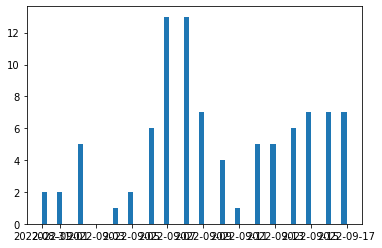

In [58]:
date_list = []
from datetime import datetime
#dt = datetime.strptime(str(item['delngDe']), '%Y%m%d')

for i in range(len(list_df)):
  if int(list_df[i]['created_at'].min()[:10].replace('-', '')) < 20220831:
    continue
  datetime_object = datetime.strptime(list_df[i]['created_at'].min()[:10], '%Y-%m-%d')
  date_list.append(datetime_object)
  
#date_list

plt.hist(date_list, bins=60)
plt.show()

In [59]:
len(date_list)

93

In [ ]:
# date_list.hist()

### 1.4 채팅방별 1일 평균 채팅 수

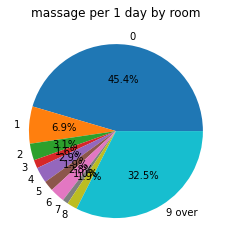

In [89]:
df_tmp = pd.DataFrame()

list_average = []
for i in range(len(list_lenPerRoom)):

  if list_datePerRoom[i] != 0:  
    list_average.append(list_lenPerRoom[i]/list_datePerRoom[i]) # list_average에 1일 평균 채팅 수 추가

  else: # list_dataPerRoom[i] == 0 이면, 채팅 수가 1개 이하이거나 개설일이 1일 이하인 것을 의미
    list_average.append(0)  # 1일 평균 채팅 수가 1 미만인 것은 0으로 처리


tmp_list = [0] * 10
for i in range(len(list_average)):   
  if int(list_average[i]) >= 9:
    tmp_list[9] += 1    # 9over에 하나 추가
  else:
    tmp_list[int(list_average[i])] += 1   # 

plt.pie(tmp_list, labels=[0,1, 2, 3, 4, 5, 6, 7, 8, '9 over'],  autopct='%.1f%%')
plt.title('massage per 1 day by room')
plt.show()


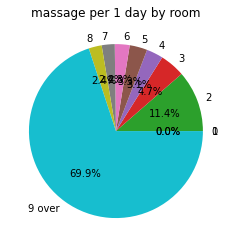

In [93]:
tmp_list = [0] * 10
for i in range(len(list_lenPerRoom)):   # list_lenPerRoom : 방 별 채팅 수
  if int(list_lenPerRoom[i]) >= 9:
    tmp_list[9] += 1    # 9over에 하나 추가
  else:
    tmp_list[int(list_lenPerRoom[i])] += 1   # 

plt.pie(tmp_list, labels=[0,1, 2, 3, 4, 5, 6, 7, 8, '9 over'],  autopct='%.1f%%')
plt.title('massage per 1 day by room')
plt.show()

In [ ]:
list_df[0]

In [26]:
sum(list_average)/len(list_lenPerRoom)  # 방 평균 채팅 수

25.091065534977943

### 1.5 방 별 시간대 채팅 추이

477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

306950    ?? 곰돌파 ??
306951    ?? 곰돌파 ??
306952    ?? 곰돌파 ??
306972    ?? 곰돌파 ??
306973    ?? 곰돌파 ??
            ...    
597730    ?? 곰돌파 ??
597801    ?? 곰돌파 ??
597802    ?? 곰돌파 ??
597803    ?? 곰돌파 ??
597807    ?? 곰돌파 ??
Name: channel_name, Length: 4100, dtype: object
hour
0     203
1      77
2      16
3       5
4       8
7       4
8      34
9      19
10     29
11     28
12     48
13     72
14    143
15    143
16     53
17    241
18    214
19    424
20    344
21    661
22    794
23    540
dtype: int64


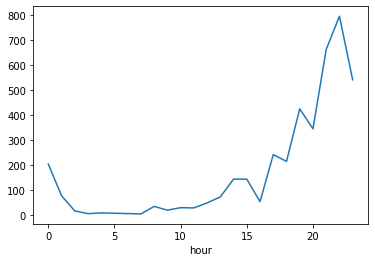

In [94]:
# 입력으로 dataframe과 채널 url을 집어넣으면 해당 채널의 메세지만 가져옴
def GetMessageByRoom(df):

  pass


from datetime import timedelta
pd.to_datetime(list_df[0]['created_at'])


df_analysis = pd.DataFrame()
# index는 sender_nickname
#df_analysis.columns = ['IsCeleb', 'MessagePerDay', 'StickerPerDay', 'ImagePerDay', 'VideoPerDay' ]

ch_index = 0
for i in range(len(list_df)):
  if list_df[i].iloc[0, 1] == best_ch:
    ch_index = i
    break
print(ch_index)

list_df[ch_index]['year'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.year
list_df[ch_index]['month'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.month
list_df[ch_index]['day'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.day
list_df[ch_index]['hour'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.hour

list_fan = list_df[ch_index]['sender_nickname']
for fan in list_fan:

  if  list_df[ch_index].iloc[0, 1] != best_ch:
    continue

  # 특정 방에 있는 사람A의 chat data
  df_fan = list_df[ch_index].groupby('sender_nickname').get_group(fan)
  
  # 스티커 메세지만 뽑기
  df_fan[df_fan['type'] == 'STICKER']
  # 이미지 메세지만 뽑기
  df_fan[df_fan['type'] == 'IMAGE']
  # 동영상 메세지만 뽑기
  df_fan[df_fan['type'] == 'VIDEO']

  df_fan.groupby([ 'hour']).size().plot()
  print(df_fan['channel_name'])
  print(df_fan.groupby(['hour']).size())
  break
  # MessagePerDay = df_fans
  # StickerPerDay = []
  # ImagePerDay = []
  # VideoPerDay = []


# def GetMessagePerDay(df, channel_url):
#   return df_result


# df_tmp = GetMessagePerDay(df_chat, best_ch)



### 1.6 시간별 채팅 수 추이(전체 데이터)

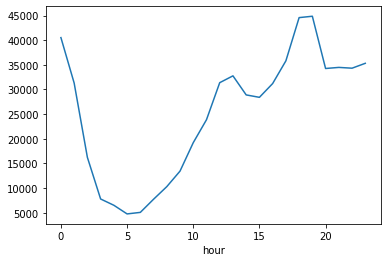

In [95]:
df_chat['hour'] = pd.to_datetime(df_chat['created_at']).dt.hour

df_chat.groupby([ 'hour']).size().plot()
 

In [30]:
list_df[ch_index]

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11,new_type,year,month,day,hour
306950,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,tpgusvkeh0@gmail.com,세 현🌸,MESG,자고있는지는...모르겠지만!\n공사 멋지게 잘 마무리 되었는지..마음에 들게 끝났는...,2022-08-28 00:53:23+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28,0
306951,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,tpgusvkeh0@gmail.com,세 현🌸,MESG,오늘 하루..? 어제 하루도도 고생했어! o(〃’▽’〃)o,2022-08-28 00:54:03+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28,0
306952,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,tpgusvkeh0@gmail.com,세 현🌸,MESG,나는 기분좋은 일이 있었는데!\n뭐냐면.. 오후에 밖에 나갔다가 돌아오는 길에 \n...,2022-08-28 01:36:32+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28,1
306953,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,dahye168@naver.com,하리보,FILE,https://file-ap-2.sendbird.com/b6d0c7d05faa447...,2022-08-28 01:37:33+0900,fan,NaN,NaN,NaN,NaN,FILE,2022,8,28,1
306954,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,yeson0621@gmail.com,됴,MESG,지금 올라온 거 잘 볼게요!,2022-08-28 02:28:06+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597815,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,예쁘다! :),2022-08-27 23:12:51+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27,23
597816,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,밤이 늦었네,2022-08-27 23:13:05+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27,23
597817,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,푹 잘 자길 바라,2022-08-27 23:13:09+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27,23
597818,🐻 곰돌파 🐻,sendbird_group_channel_90863793_15d27a6ad0ea22...,yewon1004820905@gmail.com,영원,MESG,오늘도 고생많았어,2022-08-27 23:13:18+0900,fan,NaN,NaN,NaN,NaN,MESG,2022,8,27,23


In [31]:
list_df[0][list_df[0]['type'] == 'FILE']['message'].str.contains('/fancimm/sticker')

282       False
343       False
363       False
367       False
370       False
          ...  
553817     True
553822     True
553825     True
553828    False
553835    False
Name: message, Length: 960, dtype: bool

In [32]:
list_df[0][(list_df[0]['type'] != 'FILE') & (list_df[0]['message'].str.contains('mpZz'))]

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11,new_type


In [33]:


for i in range(1, 4):
  # 1월 자료는 없고 2월 자료는 27일부터라 제외
  if i > 2 :
    df_tmp = list_df[0][pd.to_datetime(list_df[0]['created_at']).dt.month == i]

df_tmp.groupby('sender_nickname').size()


sender_nickname
Kriek_        3
cem 카야        1
김찡긋           3
김참복           8
삼별초           9
세종대왕          2
스박이          16
쏘크            2
아니꼬운곰         7
오렌지좋아         1
우리집           6
위칭           67
잘살아보세         3
첫걸음          11
캘리포니아_떡볶이     2
푸르르니          4
프로_이불러        4
하나는하나지        7
하늘의방패        21
dtype: int64

In [ ]:
!pip install sentence_transformers
!pip install torch

In [35]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import re

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [36]:
# df = df[df['message'].str.contains('참여했습니다')== False]

NameError: ignored

In [37]:
df_MESG = df_chat[df_chat['type'] == 'MESG']
df_MESG.head()

,channel_name,channel_url,sender_id,sender_nickname,type,message,created_at,id type,channel_member_count,Unnamed: 9,Unnamed: 10,Unnamed: 11,new_type,hour
0,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,으어~ 오늘도 재밌엉ㅎ습니다,2022-02-27 01:03:05+0900,celeb,135.0,NaN,NaN,NaN,MESG,1
1,김위칭,sendbird_group_channel_38649690_0c2f6fa0c6fd20...,witching_@daum.net,위칭,MESG,"@,@",2022-02-27 01:03:06+0900,celeb,135.0,NaN,NaN,NaN,MESG,1
2,임선비,sendbird_group_channel_46714279_5689ed3637baad...,lch6191@naver.com,dvl zzang,MESG,dvl zzang 님이 나갔습니다.,2022-02-27 01:05:20+0900,fan,NaN,NaN,NaN,NaN,MESG,1
3,담사장 문열어🔥🔥🔥,sendbird_group_channel_47434712_1b4c1283dc929d...,vip2405@daum.net,불새의전설,MESG,담사장 오늘도 너무고생했어요~!,2022-02-27 01:11:45+0900,fan,NaN,NaN,NaN,NaN,MESG,1
4,뽀린걸 Group Channel,sendbird_group_channel_47137877_f7e02b815f1428...,skyshows@naver.com,어짜피 최고 귀여운 사람은 뽀린걸,MESG,뽀린걸 만세,2022-02-27 01:22:00+0900,fan,NaN,NaN,NaN,NaN,MESG,1


In [38]:
def clean_message(df):
  #REPLACE_NO_SPACE = re.compile()
  REPLACE_WITH_SPACE = re.compile(r'[가-힣a-zA-Z]')

  tempArr= []
  for line in df:
    tmpL = line

    # #tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    # tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)

    tmpL = re.sub('[^A-Za-z0-9가-힣]', ' ', tmpL)

    tempArr.append(tmpL)
  return tempArr


In [39]:
df_MESG['clean_massage'] = clean_message(df_MESG['message'])
df_MESG['clean_massage']

TypeError: ignored

In [40]:
corpus = list(df_MESG['message'])
#corpus = corpus[0:100]

In [41]:
embedder = SentenceTransformer('jhgan/ko-sroberta-multitask')
corpus_embeddings = embedder.encode(corpus)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/931 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/585 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

TypeError: ignored

In [ ]:
num_clusters = 4
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/SUIT-Regular.ttf', width=800, height=500, random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    

In [ ]:
word_cloud(cluster_df,0)

In [ ]:
word_cloud(cluster_df,1)

In [ ]:
word_cloud(cluster_df,2)

In [ ]:
word_cloud(cluster_df,3)